In [ ]:
!nvidia-smi

Sun May 28 15:15:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. 

 

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralyticsplus

!pip install gradio

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.5/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics 

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
100% 6.23M/6.23M [00:00<00:00, 109MB/s]

2023-05-28 15:15:55.704259: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 15:15:57.498907: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 7.87MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 157.7ms
Speed: 0.8ms pre-process, 157.7ms inference, 414.5ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# %cd {HOME}
# Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72713, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Custom Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive', )#force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/YOLOv8

/content/drive/.shortcut-targets-by-id/1Z5OUlv0pTXhGPaJkVUtvipOM1IXumssp/YOLOv8


In [ ]:
%cd /content/drive/MyDrive/YOLOv8

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/.shortcut-targets-by-id/1Z5OUlv0pTXhGPaJkVUtvipOM1IXumssp/YOLOv8
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False

In [ ]:
!ls runs/detect/train/

args.yaml  weights


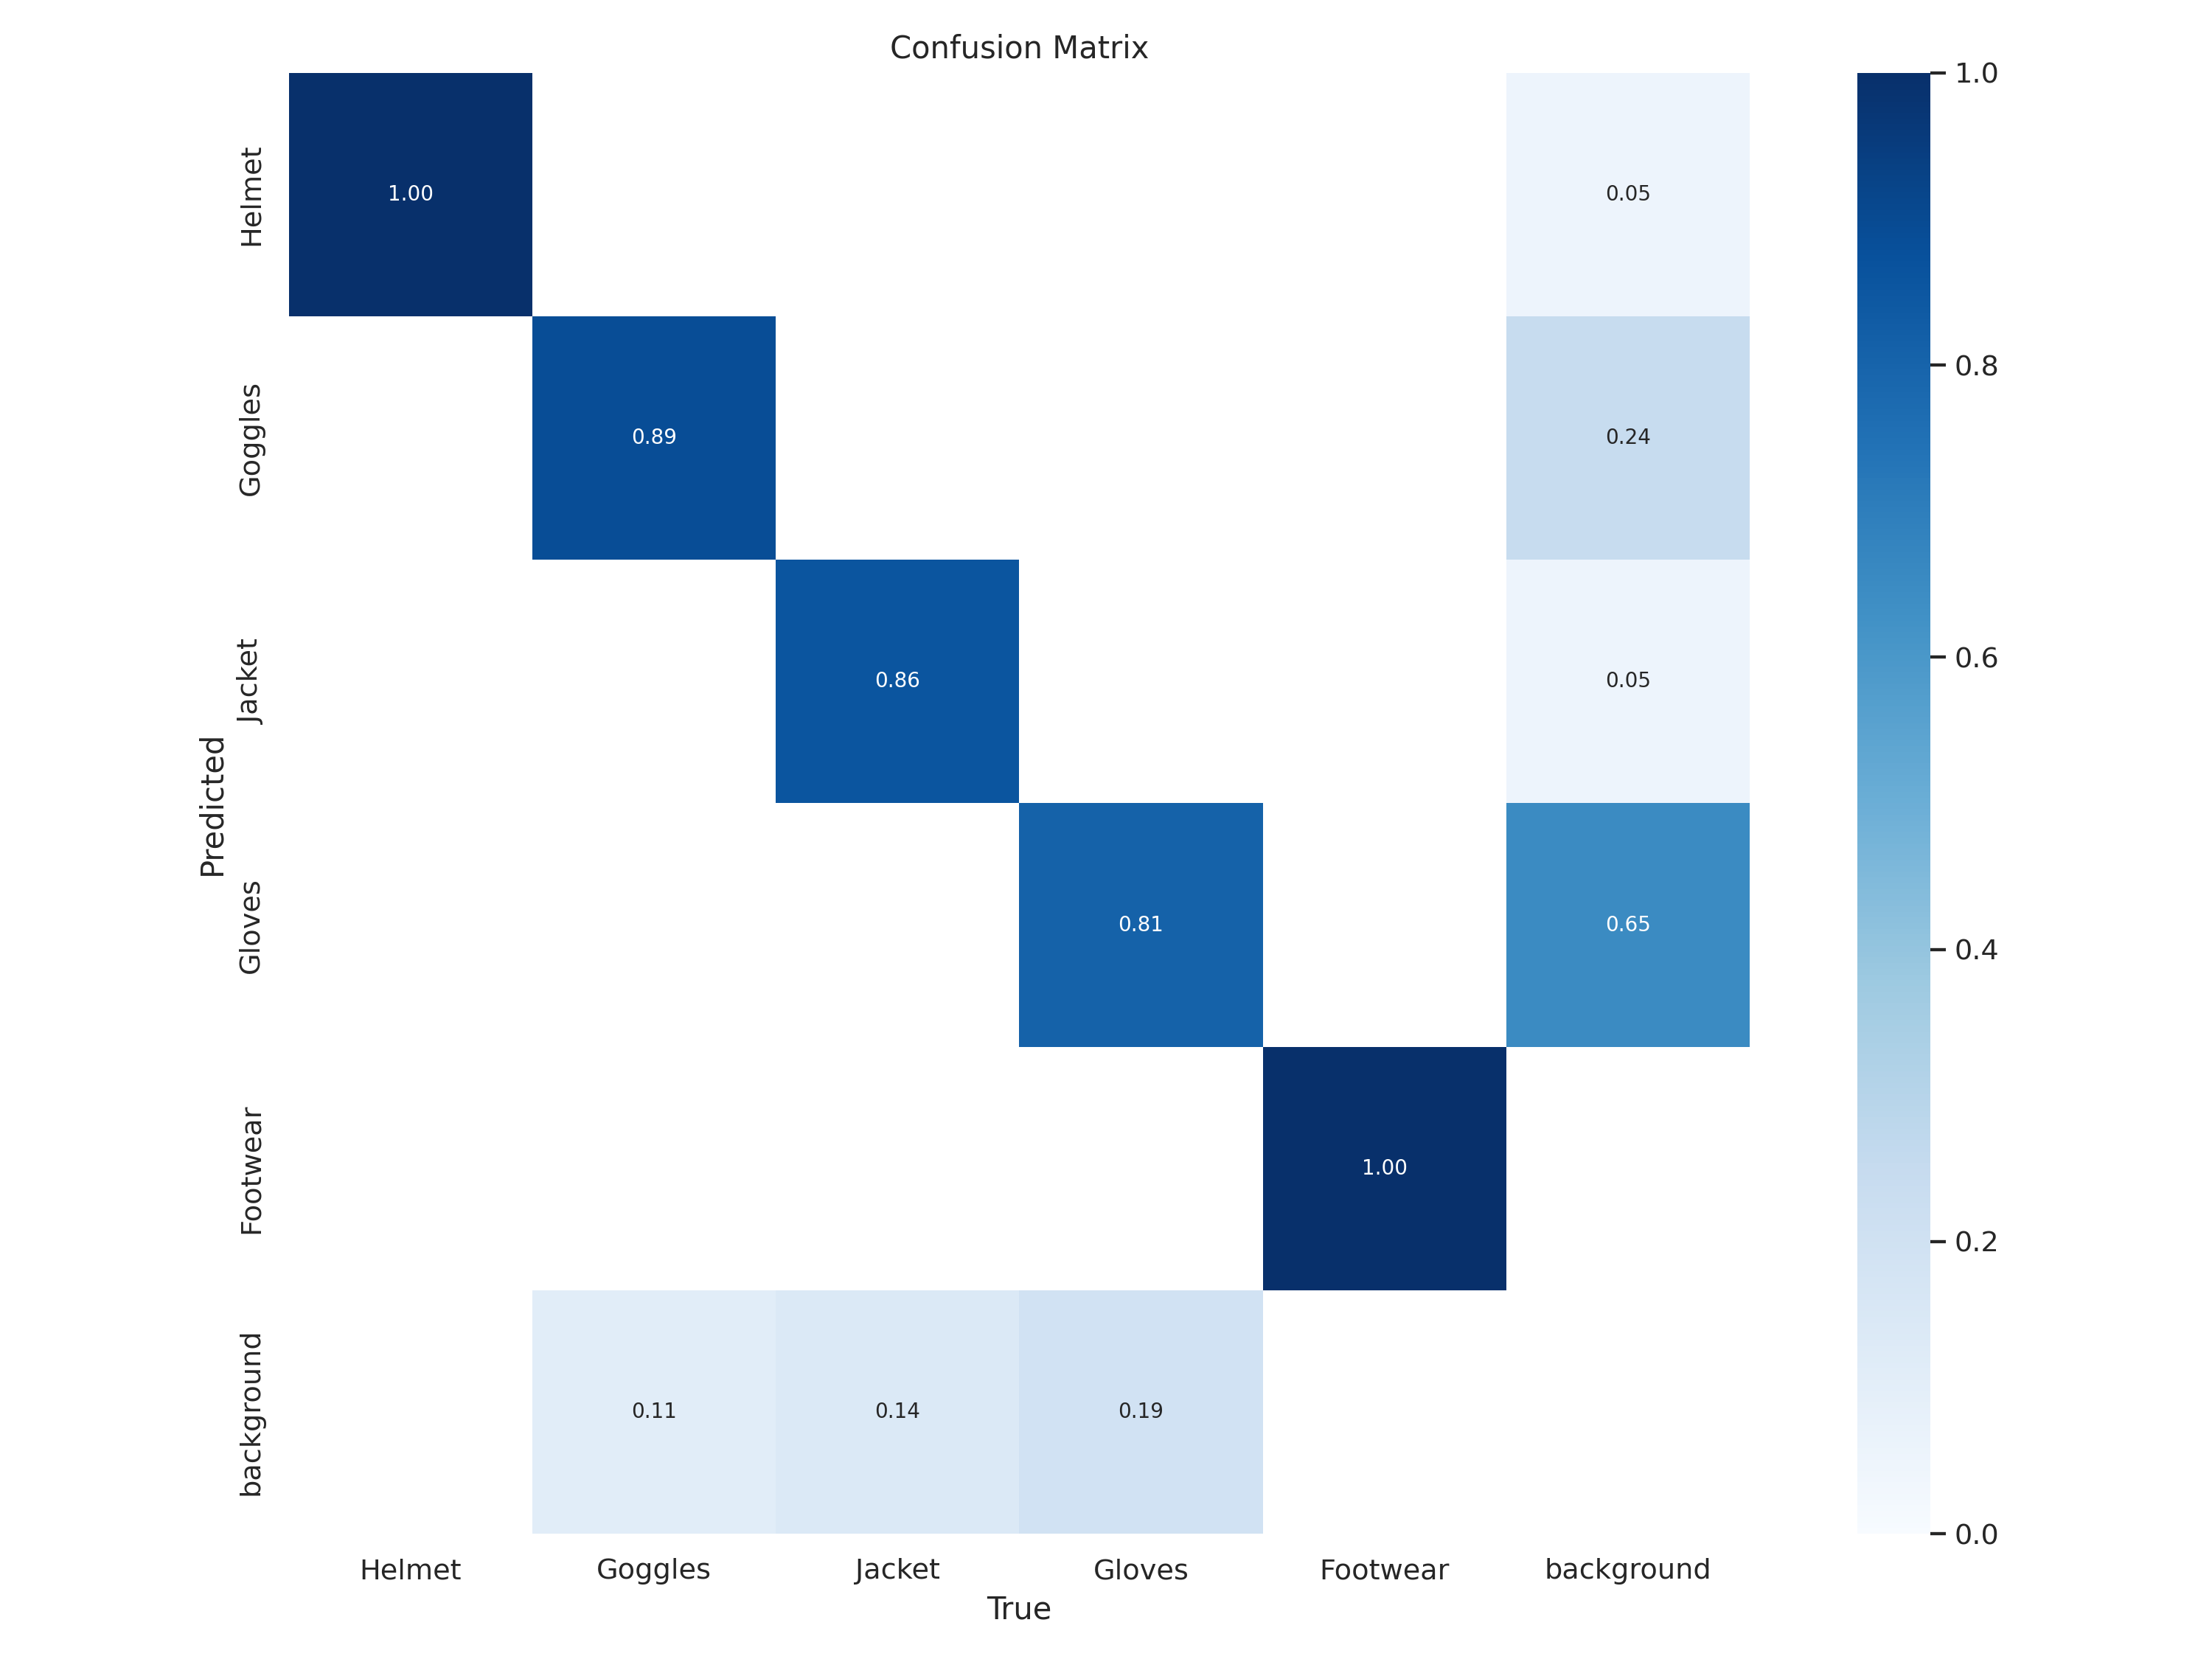

In [ ]:
Image(filename='/content/drive/MyDrive/YOLOv8/runs/detect/train3/confusion_matrix.png', width=600)

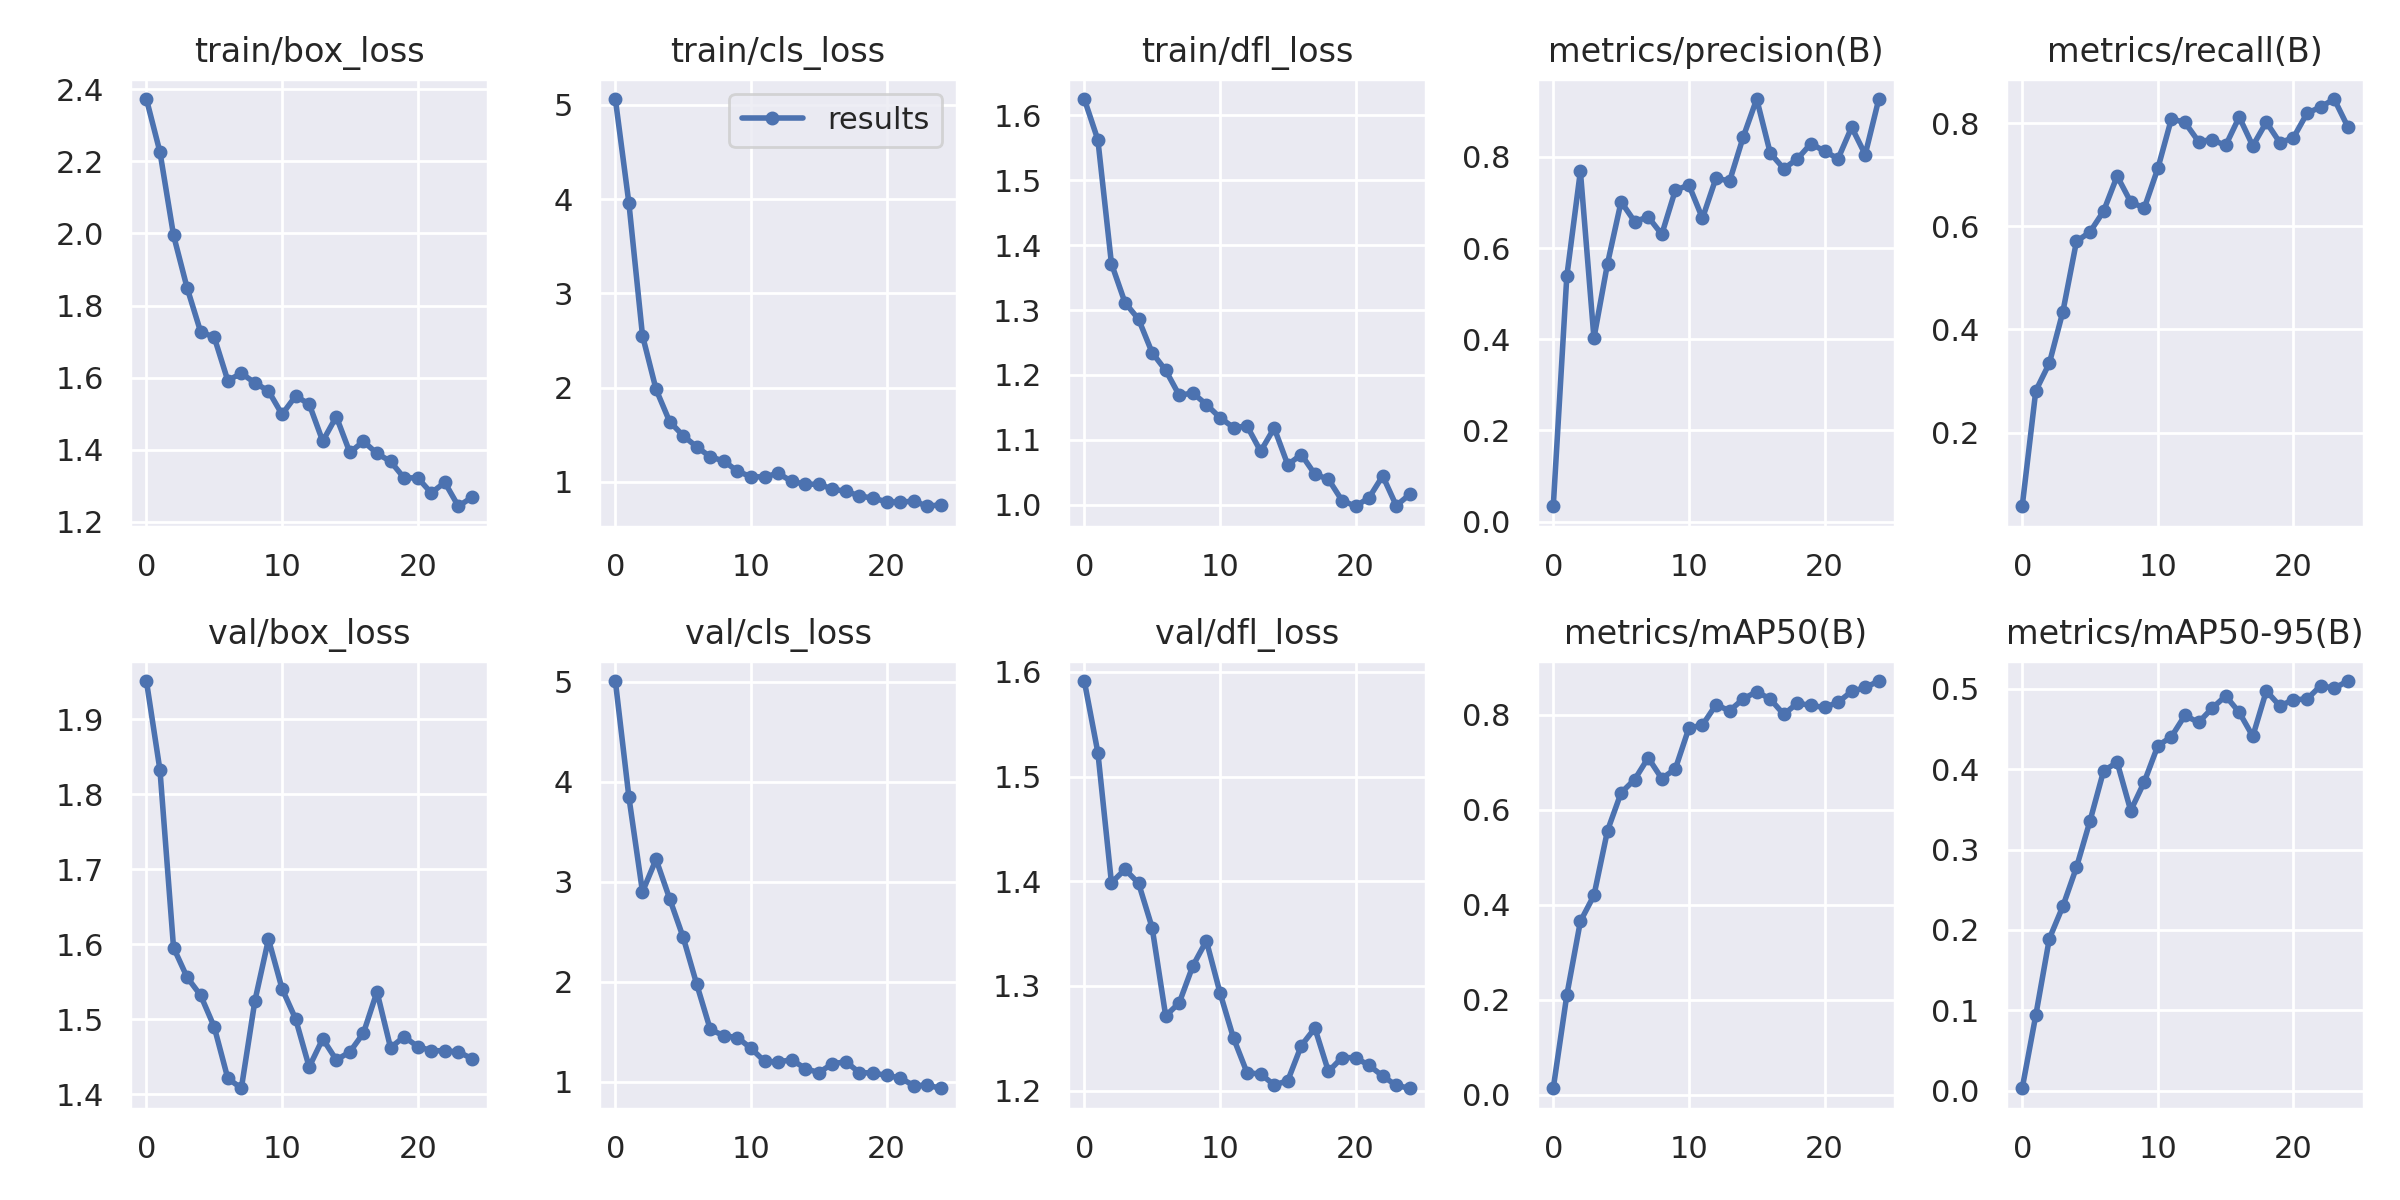

In [ ]:
Image(filename='/content/drive/MyDrive/YOLOv8/runs/detect/train3/results.png', width=600)

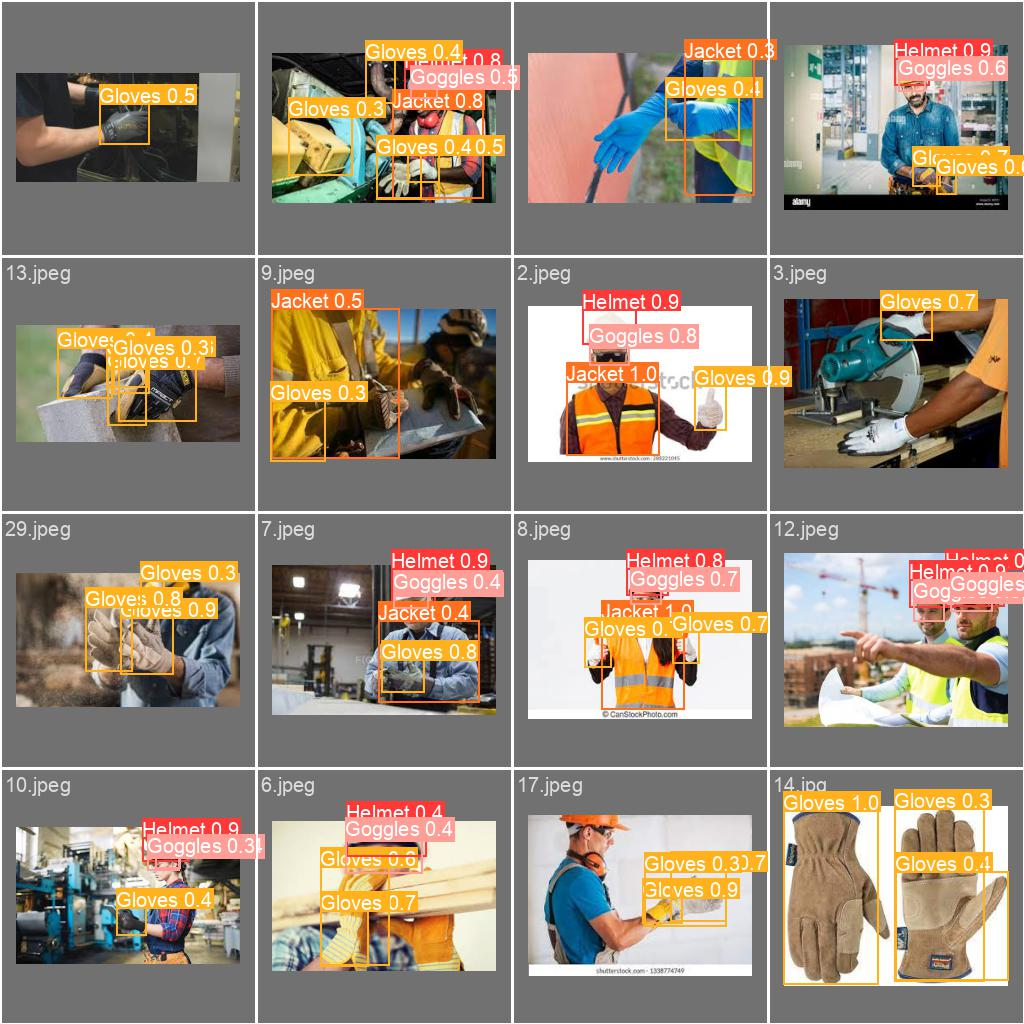

In [ ]:
Image(filename='/content/drive/MyDrive/YOLOv8/runs/detect/train3/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/YOLOv8/runs/detect/train3/weights/best.pt data=data.yaml

2023-05-28 15:19:45.819057: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1Z5OUlv0pTXhGPaJkVUtvipOM1IXumssp/YOLOv8/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.37it/s]
                   all         31        101      0.899      0.803      0.867      0.501
                Helmet         31         18      0.972          1      0.995      0.715
               Goggles         31          9      0.743      0.646      0.697      0.282
                Jacket         31         14      0.991      0.857       0.91      0.659
                Gloves         31         

## Inference with Custom Model

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/YOLOv8/runs/detect/train3/weights/best.pt conf=0.25 source=data/test/images

2023-05-28 15:20:00.258740: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
image 1/31 /content/drive/.shortcut-targets-by-id/1Z5OUlv0pTXhGPaJkVUtvipOM1IXumssp/YOLOv8/data/test/images/1.jpeg: 192x224 1 Helmet, 1 Goggles, 2 Glovess, 58.0ms
image 2/31 /content/drive/.shortcut-targets-by-id/1Z5OUlv0pTXhGPaJkVUtvipOM1IXumssp/YOLOv8/data/test/images/10.jpeg: 160x224 3 Glovess, 59.4ms
image 3/31 /content/drive/.shortcut-targets-by-id/1Z5OUlv0pTXhGPaJkVUtvipOM1IXumssp/YOLOv8/data/test/images/11.jpeg: 224x224 3 Glovess, 10.5ms
image 4/31 /content/drive/.shortcut-targets-by-id/1Z5OUlv0pTXhGPaJkVUtvipOM1IXumssp/YOLOv8/data/test/images/12.jpeg: 192x224 3 Glovess, 8.7ms
image 5/31 /content/drive/.shortcut-targets-by-id/1Z5OUlv0pTXhGPaJkVUtvipOM1IXumssp/YOLOv8/data/test/images/13.jpeg: 

**NOTE:** Let's take a look at few results.

In [ ]:
!pip install ultralyticsplus
!pip install gradio
from google.colab import drive
drive.mount('/content/drive', )#force_remount=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.6/299.6 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 22.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116932 sha256=359fa8f99882d7d5b7acb1e07a9dff7295e5bf5122eeca1dc2bd05f8d5a292ed
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 24.4 MB/s eta 0:

In [ ]:
import gradio as gr
import torch
import numpy as np

from sahi.prediction import ObjectPrediction
from sahi.utils.cv import visualize_object_predictions, read_image
from ultralyticsplus import YOLO

def yolov8_inference(
    image: gr.inputs.Image = None,
    model_path: gr.inputs.Dropdown = None,
    image_size: gr.inputs.Slider = 224,
    conf_threshold: gr.inputs.Slider = 0.25,
    iou_threshold: gr.inputs.Slider = 0.45,
):
    """
    YOLOv8 inference function
    Args:
        image: Input image
        model_path: Path to the model
        image_size: Image size
        conf_threshold: Confidence threshold
        iou_threshold: IOU threshold
    Returns:
        Rendered image
    """
    model = YOLO(model_path)
    model.conf = conf_threshold
    model.iou = iou_threshold
    results = model.predict(image, imgsz=image_size, )#return_outputs=True)
    print("Outputs", results[0].numpy())
    # data = np.array(results[0].numpy(), dtype=np.float32)
    print("Boxexes",results[0].boxes.boxes)
    object_prediction_list = []
    outputs = results[0].boxes.boxes.numpy()
    for pred in outputs:
        print(type(pred),pred)
        x1, y1, x2, y2 = (
            int(pred[0]),
            int(pred[1]),
            int(pred[2]),
            int(pred[3]),
        )
        bbox = [x1, y1, x2, y2]
        score = pred[4]
        category_name = model.model.names[int(pred[5])]
        category_id = pred[5]
        object_prediction = ObjectPrediction(
            bbox=bbox,
            category_id=int(category_id),
            score=score,
            category_name=category_name,
        )
        object_prediction_list.append(object_prediction)
            
    image = read_image(image)
    output_image = visualize_object_predictions(image=image, object_prediction_list=object_prediction_list)
    return output_image['image']

In [ ]:
# yolov8_inference("/content/drive/MyDrive/YOLOv8/data/test/images/10.jpeg","/content/drive/MyDrive/YOLOv8/runs/detect/train3/weights/best.pt")

In [ ]:
inputs = [
    gr.inputs.Image(type="filepath", label="Input Image"),
    gr.inputs.Dropdown(["/content/drive/MyDrive/YOLOv8/runs/detect/train3/weights/best.pt", "/content/drive/MyDrive/YOLOv8/runs/detect/train3/weights/best.pt"], 
                       default="owaiskha9654/yolov8-custom_objects", label="Model"),
    gr.inputs.Slider(minimum=224, maximum=448, default=224, step=32, label="Image Size"),
    gr.inputs.Slider(minimum=0.0, maximum=1.0, default=0.25, step=0.05, label="Confidence Threshold"),
    gr.inputs.Slider(minimum=0.0, maximum=1.0, default=0.45, step=0.05, label="IOU Threshold"),
]

outputs = gr.outputs.Image(type="filepath", label="Output Image")
title = "Custom YOLOv8: Trained on Industrial Equipments predictions"

examples = [['/content/drive/MyDrive/YOLOv8/data/test/images/20.jpeg', '/content/drive/MyDrive/YOLOv8/runs/detect/train3/weights/best.pt', 224, 0.25, 0.45], ['/content/drive/MyDrive/YOLOv8/data/test/images/30.jpeg', '/content/drive/MyDrive/YOLOv8/runs/detect/train3/weights/best.pt', 224, 0.25, 0.45],]# ['17.jpeg', 'owaiskha9654/yolov8-custom_objects', 1280, 0.25, 0.45]]
demo_app = gr.Interface(
    fn=yolov8_inference,
    inputs=inputs,
    outputs=outputs,
    title=title,
    examples=examples,
    cache_examples=False,
    theme='huggingface',
)
demo_app.launch(debug=True, enable_queue=False,inline=True)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:219: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:222: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/di

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Ultralytics YOLOv8.0.43 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /tmp/gradio/5191c78ffa43f47c0312d01db8bae65b9f3a0c7d/image.png: 224x160 1 Helmet, 1 Jacket, 2 Glovess, 2 Footwears, 91.5ms
Speed: 0.3ms preprocess, 91.5ms inference, 1.2ms postprocess per image at shape (1, 3, 224, 224)


Outputs [[         61          81         117         155     0.91036           2]
 [         76          45         105          64     0.70919           0]
 [         54         230          81         251     0.63966           4]
 [        103         145         121         173      0.5379           3]
 [        105         228         132         249      0.5255           4]
 [         58         146          77         173     0.42702           3]]
Boxexes tensor([[ 61.00000,  81.00000, 117.00000, 155.00000,   0.91036,   2.00000],
        [ 76.00000,  45.00000, 105.00000,  64.00000,   0.70919,   0.00000],
        [ 54.00000, 230.00000,  81.00000, 251.00000,   0.63966,   4.00000],
        [103.00000, 145.00000, 121.00000, 173.00000,   0.53790,   3.00000],
        [105.00000, 228.00000, 132.00000, 249.00000,   0.52550,   4.00000],
        [ 58.00000, 146.00000,  77.00000, 173.00000,   0.42702,   3.00000]])
<class 'numpy.ndarray'> [         61          81         117         155    

Ultralytics YOLOv8.0.43 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /tmp/gradio/7f70c62651b2fe8e37c4349d0a1cce52b563b732/image.png: 256x352 1 Goggles, 2 Glovess, 175.9ms
Speed: 2.0ms preprocess, 175.9ms inference, 0.9ms postprocess per image at shape (1, 3, 352, 352)


Outputs [[         56          54         147         178     0.93315           3]
 [         57         110         113         178      0.3775           3]
 [         88          21         184          53     0.26419           1]]
Boxexes tensor([[ 56.00000,  54.00000, 147.00000, 178.00000,   0.93315,   3.00000],
        [ 57.00000, 110.00000, 113.00000, 178.00000,   0.37750,   3.00000],
        [ 88.00000,  21.00000, 184.00000,  53.00000,   0.26419,   1.00000]])
<class 'numpy.ndarray'> [         56          54         147         178     0.93315           3]
<class 'numpy.ndarray'> [         57         110         113         178      0.3775           3]
<class 'numpy.ndarray'> [         88          21         184          53     0.26419           1]


Ultralytics YOLOv8.0.43 🚀 Python-3.10.11 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /tmp/gradio/7f70c62651b2fe8e37c4349d0a1cce52b563b732/image.png: 192x288 1 Helmet, 1 Goggles, 3 Glovess, 120.5ms
Speed: 1.2ms preprocess, 120.5ms inference, 0.9ms postprocess per image at shape (1, 3, 288, 288)


Outputs [[         60          54         146         181     0.96058           3]
 [        122          50         275         119      0.6692           0]
 [          1         125          81         183     0.54693           3]
 [         86          23         187          61     0.27583           1]
 [         60         112         114         178     0.27544           3]]
Boxexes tensor([[ 60.00000,  54.00000, 146.00000, 181.00000,   0.96058,   3.00000],
        [122.00000,  50.00000, 275.00000, 119.00000,   0.66920,   0.00000],
        [  1.00000, 125.00000,  81.00000, 183.00000,   0.54693,   3.00000],
        [ 86.00000,  23.00000, 187.00000,  61.00000,   0.27583,   1.00000],
        [ 60.00000, 112.00000, 114.00000, 178.00000,   0.27544,   3.00000]])
<class 'numpy.ndarray'> [         60          54         146         181     0.96058           3]
<class 'numpy.ndarray'> [        122          50         275         119      0.6692           0]
<class 'numpy.ndarray'> [      